In [2]:
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import numpy as np
from KernelTools import *

In [80]:
n = 40
rho0_samples = jnp.array(np.random.randn(n))
rho1_samples = jnp.array(np.hstack([np.random.randn(n//2)/2,np.random.randn(n//2)/2 + 3]))

$$G(v) = \mathbb{E}[|v_t(I(x_0,x_1,t))|^2 - 2 \partial_t I(x_0,x_1,t) \cdot v_t(I(x_0,x_1))]$$


In [81]:
def I(x,y,t):
    return jnp.cos(jnp.pi/2 * t)*x + jnp.sin(jnp.pi/2 * t)*y

def It(x,y,t):
    return (-jnp.pi/2)*jnp.sin(jnp.pi/2 * t)*x + (jnp.pi/2) * jnp.cos(jnp.pi/2 * t)*y


def Istacked(x,y,t):
    return jnp.array([jnp.cos(jnp.pi/2 * t)*x + jnp.sin(jnp.pi/2 * t)*y,t])

t_vals = jnp.linspace(0,1,10)


In [82]:
A,B = jnp.meshgrid(rho0_samples,rho1_samples)
X0 = A.flatten()
X1 = B.flatten()


Ix_t = jnp.hstack([[I(X0,X1,t),t*jnp.ones(len(X0))] for t in t_vals]).T
It_vals = jnp.hstack([It(X0,X1,t) for t in t_vals])

In [83]:
k_single = get_gaussianRBF(0.5)
k = vectorize_kfunc(k_single)
K = k(Ix_t,Ix_t)

In [84]:
alpha = jnp.linalg.solve(K+1e-5*diagpart(K),It_vals)

In [ ]:
def get_v(x,t):
    return k(jnp.hstack(x,t),Ix_t)

In [113]:
x_grid = jnp.linspace(-8,8,50)
t_grid = jnp.linspace(0,1,20)

In [114]:
pred_grid = [
    k(jnp.vstack([x_grid,t*np.ones(len(x_grid))]).T,Ix_t)@alpha for t in t_grid
]

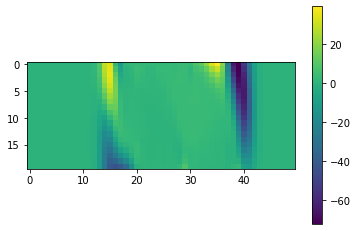

In [115]:
plt.imshow(pred_grid)
plt.colorbar()

In [104]:
init_cons = jnp.linspace(-5,5,200)


In [106]:
x_vals = [init_cons]
dt = 0.005
t = 0
x_state = init_cons
t_vals = [t]
for i in range(200):
    t += dt
    t_vals+=[t]
    x_state += dt * k(jnp.vstack([x_state,t*np.ones(len(x_state))]).T,Ix_t)@alpha
    x_vals +=[x_state]

x_vals = jnp.array(x_vals)
t_vals = jnp.array(t_vals)

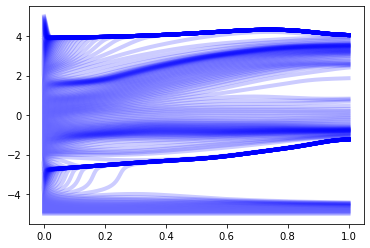

In [110]:
for i in range(len(x_vals[0])):
    plt.plot(t_vals,x_vals[:,i],c='blue',alpha = 0.2,lw = 4)


In [117]:
init_cons = jnp.array(np.random.randn(500))
x_vals = [init_cons]

dt = 0.005
t = 0
x_state = init_cons
t_vals = [t]
for i in range(200):
    t += dt
    t_vals+=[t]
    x_state += dt * k(jnp.vstack([x_state,t*np.ones(len(x_state))]).T,Ix_t)@alpha
    x_vals +=[x_state]

x_vals = jnp.array(x_vals)
t_vals = jnp.array(t_vals)


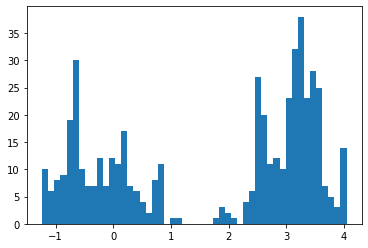

In [121]:
plt.hist(np.array(x_state),50)
plt.show()

(array([7., 4., 5., 4., 0., 1., 0., 7., 9., 3.]),
 array([-1.10407408, -0.60342008, -0.10276609,  0.39788791,  0.8985419 ,
         1.3991959 ,  1.8998499 ,  2.40050389,  2.90115789,  3.40181188,
         3.90246588]),
 <BarContainer object of 10 artists>)

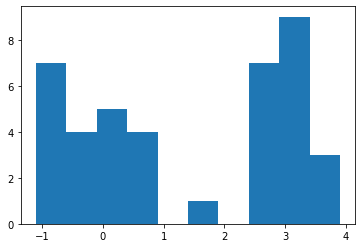

In [112]:
plt.hist(rho1_samples)